In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, LSTM, Conv1D, MaxPooling1D, Flatten
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.callbacks import ModelCheckpoint
import keras
from keras.models import load_model
from tensorflow.keras.layers import InputLayer

In [3]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [4]:
columns = train_data.drop(['PDB ID','G_experiment'], axis = 1).columns
X_train = train_data.drop(['PDB ID','G_experiment'], axis = 1)
Y_train = train_data['G_experiment']
X_test  = test_data.drop(['PDB ID','G_experiment','RR_Predict_G', 'RFR_Predict_G', 'SVR_Predict_G',
       'XGBR_Predict_G'], axis = 1)
Y_test  = test_data['G_experiment']

In [3]:
train_data.columns.unique()

Index(['PDB ID', 'Com_E', 'Com_mu_total', 'Com_-TS_total', 'Com_epsilon_total',
       'Com_V_total', 'Com_SASA', 'Com_mu_apolar', 'Com_mu_polar',
       'Com_-TS_apolar', 'Com_-TS_polar', 'Com_epsilon_apolar',
       'Com_epsilon_polar', 'Com_V_apolar', 'Com_V_polar', 'Prt_E',
       'Prt_mu_total', 'Prt_-TS_total', 'Prt_epsilon_total', 'Prt_V_total',
       'Prt_SASA', 'Prt_mu_apolar', 'Prt_mu_polar', 'Prt_-TS_apolar',
       'Prt_-TS_polar', 'Prt_epsilon_apolar', 'Prt_epsilon_polar',
       'Prt_V_apolar', 'Prt_V_polar', 'Lig_E', 'Lig_mu_total', 'Lig_-TS_total',
       'Lig_epsilon_total', 'Lig_V_total', 'Lig_SASA', 'Lig_mu_apolar',
       'Lig_mu_polar', 'Lig_-TS_apolar', 'Lig_-TS_polar', 'Lig_epsilon_apolar',
       'Lig_epsilon_polar', 'Lig_V_apolar', 'Lig_V_polar', 'Lig_N_rotatable',
       'Bind_E', 'Bind_mu_total', 'Bind_-TS_total', 'Bind_epsilon_total',
       'Bind_V_total', 'Bind_SASA', 'Bind_mu_apolar', 'Bind_mu_polar',
       'Bind_-TS_apolar', 'Bind_-TS_polar', 'Bind_eps

In [4]:
test_data.columns.unique()

Index(['PDB ID', 'Com_E', 'Com_mu_total', 'Com_-TS_total', 'Com_epsilon_total',
       'Com_V_total', 'Com_SASA', 'Com_mu_apolar', 'Com_mu_polar',
       'Com_-TS_apolar', 'Com_-TS_polar', 'Com_epsilon_apolar',
       'Com_epsilon_polar', 'Com_V_apolar', 'Com_V_polar', 'Prt_E',
       'Prt_mu_total', 'Prt_-TS_total', 'Prt_epsilon_total', 'Prt_V_total',
       'Prt_SASA', 'Prt_mu_apolar', 'Prt_mu_polar', 'Prt_-TS_apolar',
       'Prt_-TS_polar', 'Prt_epsilon_apolar', 'Prt_epsilon_polar',
       'Prt_V_apolar', 'Prt_V_polar', 'Lig_E', 'Lig_mu_total', 'Lig_-TS_total',
       'Lig_epsilon_total', 'Lig_V_total', 'Lig_SASA', 'Lig_mu_apolar',
       'Lig_mu_polar', 'Lig_-TS_apolar', 'Lig_-TS_polar', 'Lig_epsilon_apolar',
       'Lig_epsilon_polar', 'Lig_V_apolar', 'Lig_V_polar', 'Lig_N_rotatable',
       'Bind_E', 'Bind_mu_total', 'Bind_-TS_total', 'Bind_epsilon_total',
       'Bind_V_total', 'Bind_SASA', 'Bind_mu_apolar', 'Bind_mu_polar',
       'Bind_-TS_apolar', 'Bind_-TS_polar', 'Bind_eps

# Γραμμική Παλινδρόμηση

In [5]:
scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train)
X_test_s  = s_scaler.transform(X_test)
lin_reg_m = LinearRegression()
lin_reg_s = LinearRegression()
lin_reg_m.fit(X_train_m,Y_train)
lin_reg_s.fit(X_train_s,Y_train)
pred_m = lin_reg_m.predict(X_test_m)
pred_s = lin_reg_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)
mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s

(5.591566711579641,
 5.4696758220367805,
 1.9144983278508836,
 1.8902345632171753,
 0.36727616395343354,
 0.3810689478347331,
 2.3646493844922634,
 2.3387338074344375)

We observe that Standard Scaler does a better job

In [6]:
columns[lin_reg_m.coef_.argmax()], columns[lin_reg_s.coef_.argmax()]

('Lig_epsilon_total', 'Lig_epsilon_total')

# Δέντρο Απόφασης

In [6]:
scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train)
X_test_s  = s_scaler.transform(X_test)
dt_m = DecisionTreeRegressor(max_depth = 10, min_samples_split = 10, min_samples_leaf = 1, max_leaf_nodes = 10)
dt_s = DecisionTreeRegressor(max_depth = 10, min_samples_split = 2, min_samples_leaf = 5, max_leaf_nodes = 15)
dt_m.fit(X_train_m,Y_train)
dt_s.fit(X_train_s,Y_train)
pred_m = dt_m.predict(X_test_m)
pred_s = dt_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)
mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s

(6.513271499262192,
 5.968580641007841,
 2.0739680574661916,
 1.9873796931333685,
 0.2629789930447388,
 0.3246144714483986,
 2.5521111847374893,
 2.443067874826207)

We observe that MinMax Scaler does a better job

In [8]:
columns[dt_m.feature_importances_.argmax()], columns[dt_s.feature_importances_.argmax()]

('Lig_-TS_total', 'Lig_-TS_total')

# Τυχαίο Δάσος

In [7]:
scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train)
X_test_s  = s_scaler.transform(X_test)
rf_m = RandomForestRegressor(100, max_depth = 10, min_samples_split = 10, min_samples_leaf = 1, max_leaf_nodes = 10)
rf_s = RandomForestRegressor(100, max_depth = 10, min_samples_split = 2, min_samples_leaf = 5, max_leaf_nodes = 15)
rf_m.fit(X_train_m,Y_train)
rf_s.fit(X_train_s,Y_train)
pred_m = rf_m.predict(X_test_m)
pred_s = rf_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)
mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s

(5.837152302015993,
 5.517607163433143,
 1.9493077683255324,
 1.9012053526806951,
 0.33948648265769665,
 0.37564519027992127,
 2.416019929970776,
 2.348958740257722)

We observe that MinMax Scaler does a better job

In [10]:
columns[rf_m.feature_importances_.argmax()], columns[rf_s.feature_importances_.argmax()]

('Bind_SASA', 'Lig_-TS_total')

# Κ-Κοντινότεροι Γείτονες

In [8]:
scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train)
X_test_s  = s_scaler.transform(X_test)
knn_m = KNeighborsRegressor(7)
knn_s = KNeighborsRegressor(2)
knn_m.fit(X_train_m,Y_train)
knn_s.fit(X_train_s,Y_train)
pred_m = knn_m.predict(X_test_m)
pred_s = knn_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)
mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s

(4.548842944012874,
 5.294992825439726,
 1.7601320769790925,
 1.744859722803404,
 0.48526745623033274,
 0.40083551799298733,
 2.132801665418722,
 2.3010851408497963)

We observe that MinMax Scaler does a better job

# Μηχανές Διανυσμάτων Υποστήριξης

In [9]:
scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train)
X_test_s  = s_scaler.transform(X_test)
svm_m = SVR(kernel = 'sigmoid', C = 50, gamma = 0.001)
svm_s = SVR(kernel = 'rbf', C = 50, gamma = 0.01)
svm_m.fit(X_train_m,Y_train)
svm_s.fit(X_train_s,Y_train)
pred_m = svm_m.predict(X_test_m)
pred_s = svm_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)
mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s

(6.685929144157026,
 4.935233844375924,
 2.0780981383386634,
 1.759414222068109,
 0.24344160521846303,
 0.4415446956335751,
 2.5857163696269985,
 2.221538620950787)

We observe that Standard Scaler does a better job

# XGBoost

3716

C:\Users\Νικήτας\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


4.122873876766047 4.188628970038946 1.6056336149315107 1.6376125857584491 0.5334687558244942 0.526028119415906 2.030486118338672 2.0466140256626177


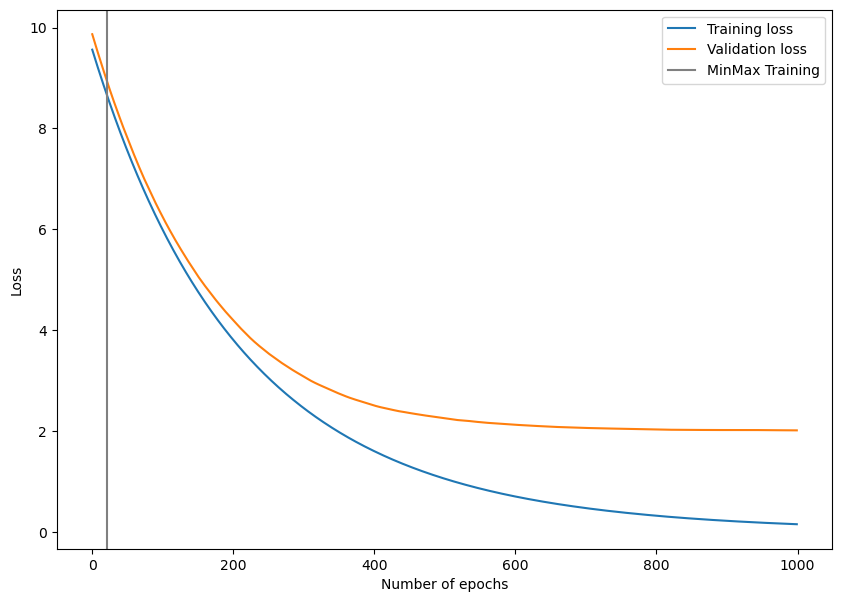

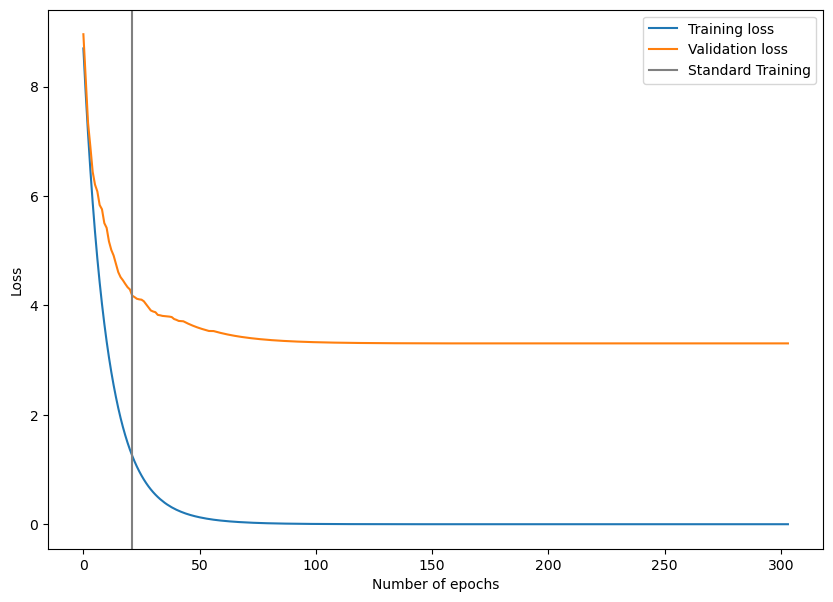

In [18]:
scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_ = X_train[:-100]
Y_train_ = Y_train[:-100]
X_val = X_train[-100:]
Y_val = Y_train[-100:]
X_train_m = scaler.fit_transform(X_train_)
X_val_m = scaler.transform(X_val)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train_)
X_val_s = s_scaler.transform(X_val)
X_test_s  = s_scaler.transform(X_test)
xgb_m = xgb.XGBRegressor(n_estimators=1000, max_depth=100, learning_rate = 0.005) 
xgb_s = xgb.XGBRegressor(n_estimators=1000, max_depth=100, learning_rate = 0.1) 
xgb_m.fit(X_train_m,Y_train_, eval_set=[(X_train_m, Y_train_), (X_val_m, Y_val)], 
            early_stopping_rounds=100, verbose = 0)
xgb_s.fit(X_train_s,Y_train_, eval_set=[(X_train_s, Y_train_), (X_val_m, Y_val)], 
            early_stopping_rounds=100, verbose = 0)
pred_m = xgb_m.predict(X_test_m)
pred_s = xgb_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)

results = xgb_m.evals_result()
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="MinMax Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

results = xgb_s.evals_result()
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Standard Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

print(mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s)

# MLP

7/7 [==============================] - 0s 2ms/step


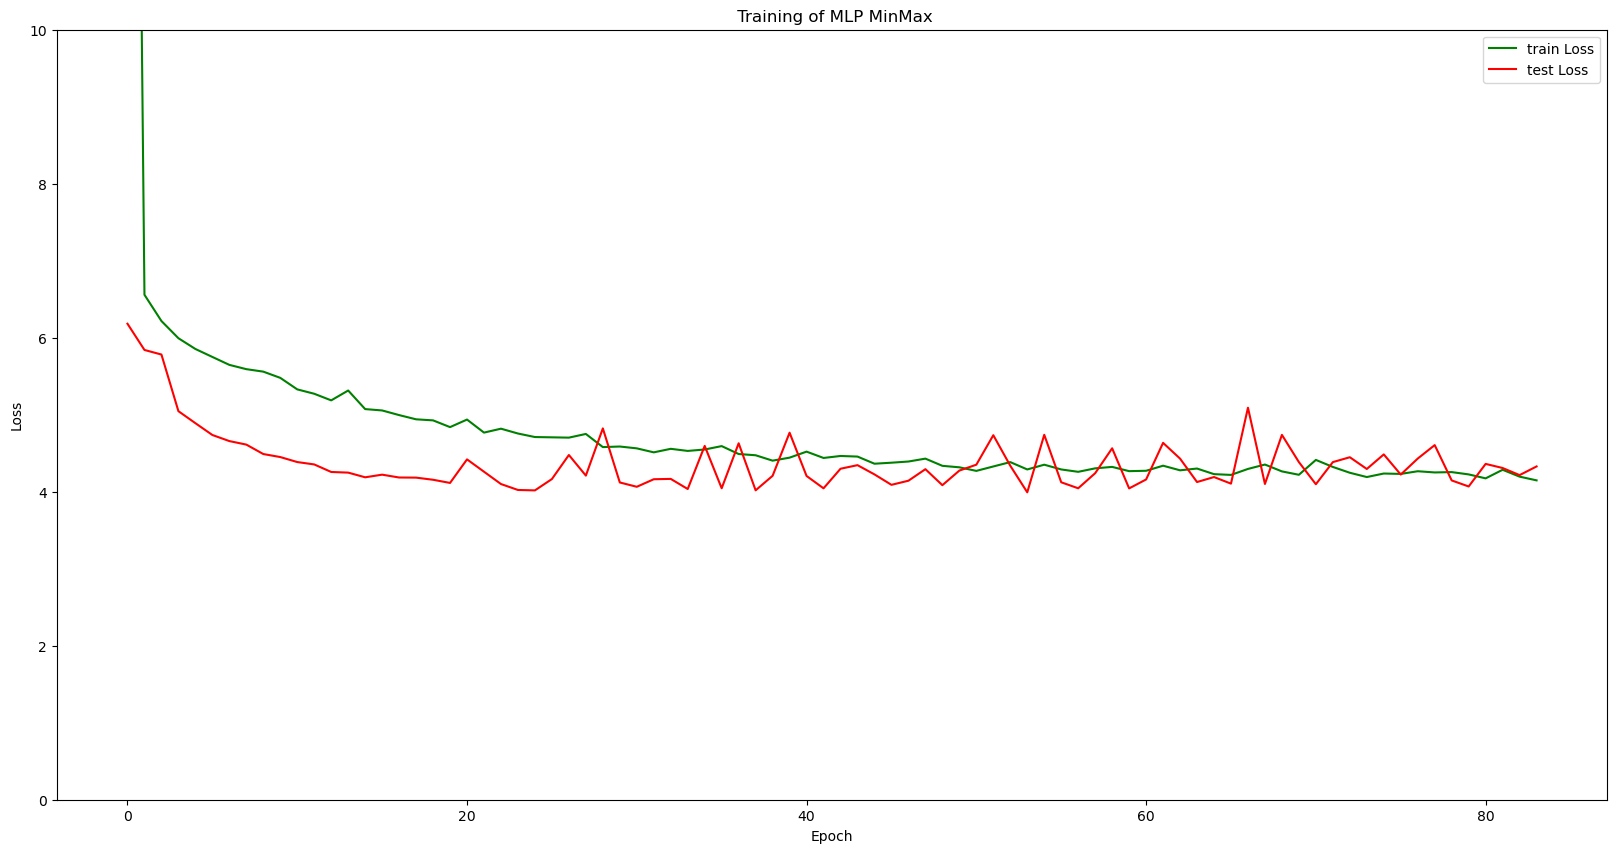

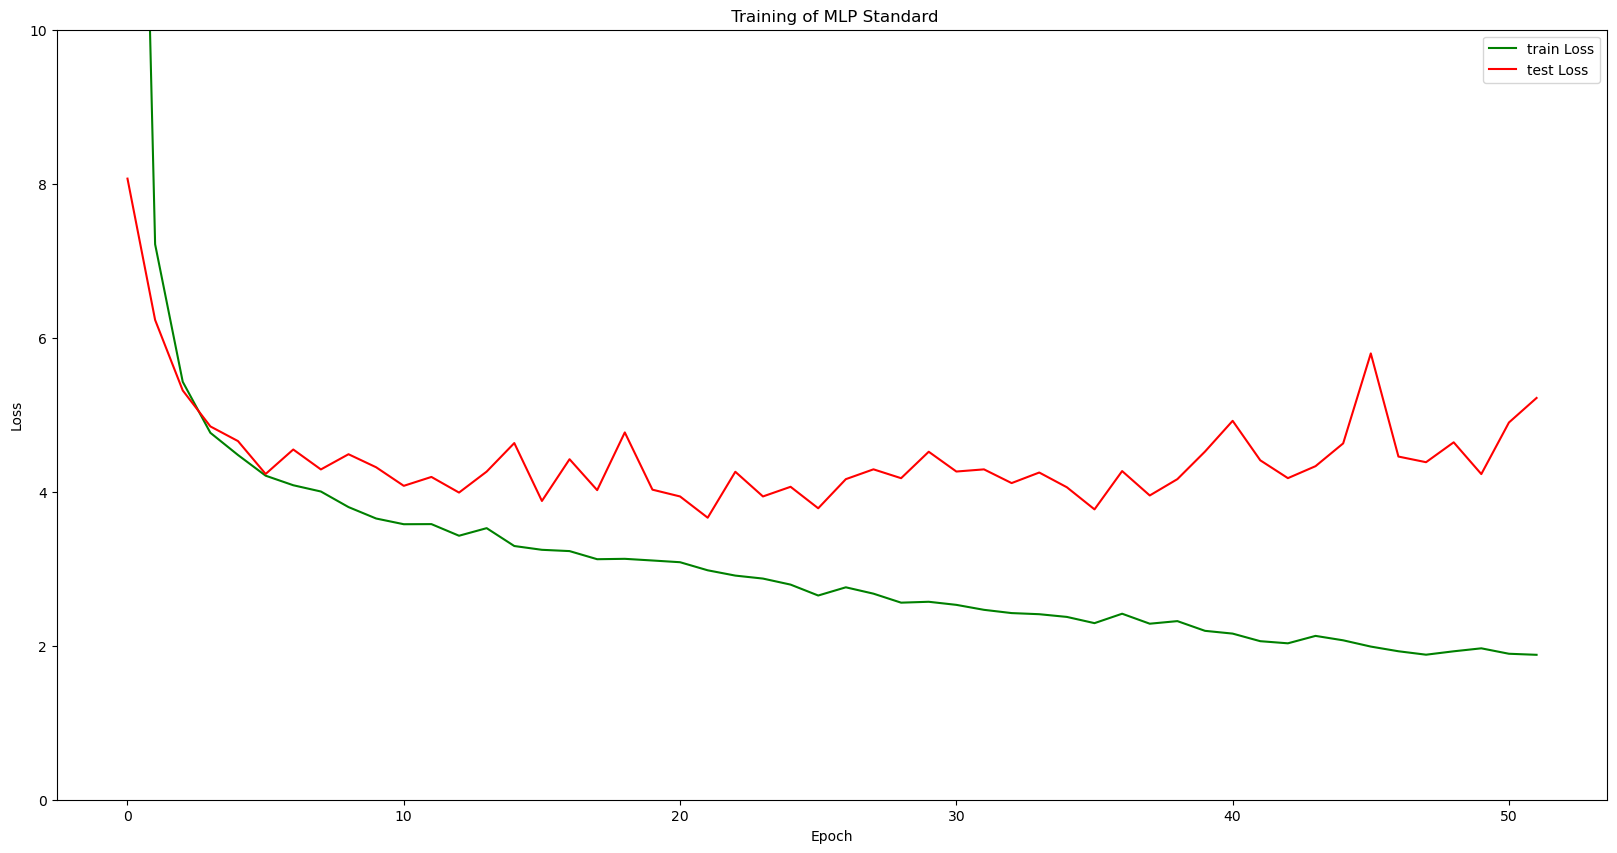

5.0989892387937905 4.503111606635774 1.802887866215261 1.663358564405013 0.4230146580477193 0.49044226835460825 2.2580941607456917 2.1220536295380885


In [25]:
def create_MLP(size):
    model_mlp_focal_loss = Sequential()
    model_mlp_focal_loss.add(InputLayer(input_shape=(size), ))
    model_mlp_focal_loss.add(Dense(90, activation='relu'))
    model_mlp_focal_loss.add(Dense(70, activation='relu'))
    model_mlp_focal_loss.add(Dense(40, activation='relu'))
    model_mlp_focal_loss.add(Dense(1, activation='linear'))
    model_mlp_focal_loss.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss= 'mse')
    return model_mlp_focal_loss
def create_MLP_m(size):
    model_mlp_focal_loss = Sequential()
    model_mlp_focal_loss.add(InputLayer(input_shape=(size), ))
    model_mlp_focal_loss.add(Dense(80, activation='relu'))
    model_mlp_focal_loss.add(Dense(50, activation='relu'))
    model_mlp_focal_loss.add(Dense(30, activation='relu'))
    model_mlp_focal_loss.add(Dense(10, activation='relu'))
    model_mlp_focal_loss.add(Dense(1, activation='linear'))
    model_mlp_focal_loss.compile(optimizer= tf.keras.optimizers.Adam(0.0005), loss= 'mse')
    return model_mlp_focal_loss

def create_MLP_s(size):
    model_mlp_focal_loss = Sequential()
    model_mlp_focal_loss.add(InputLayer(input_shape=(size), ))
    model_mlp_focal_loss.add(Dense(100, activation='relu'))
    model_mlp_focal_loss.add(Dense(80, activation='relu'))
    model_mlp_focal_loss.add(Dense(50, activation='relu'))
    model_mlp_focal_loss.add(Dense(1, activation='linear'))
    model_mlp_focal_loss.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'mse')
    return model_mlp_focal_loss
# learning_rate_fn = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=30, restore_best_weights = True)
# mc = ModelCheckpoint('best.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_ = X_train[:-100]
Y_train_ = Y_train[:-100]
X_val = X_train[-100:]
Y_val = Y_train[-100:]
X_train_m = scaler.fit_transform(X_train_)
X_val_m = scaler.transform(X_val)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train_)
X_val_s = s_scaler.transform(X_val)
X_test_s  = s_scaler.transform(X_test)

mlp_m = create_MLP_m(len(X_train_m[0]))
mlp_s = create_MLP_s(len(X_train_s[0]))
h1 = mlp_m.fit(X_train_m,Y_train_, validation_data = (X_val_m, Y_val), epochs=100, callbacks=[es], verbose = 0)
h2 = mlp_s.fit(X_train_s,Y_train_, validation_data = (X_val_s, Y_val), epochs=100, callbacks=[es], verbose = 0)
pred_m = mlp_m.predict(X_test_m)
pred_s = mlp_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)

plt.figure(figsize=(20,10))
plt.plot( h1.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h1.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of MLP MinMax')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot( h2.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h2.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of MLP Standard')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

print(mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s)

# LSTM

7/7 [==============================] - 1s 22ms/step


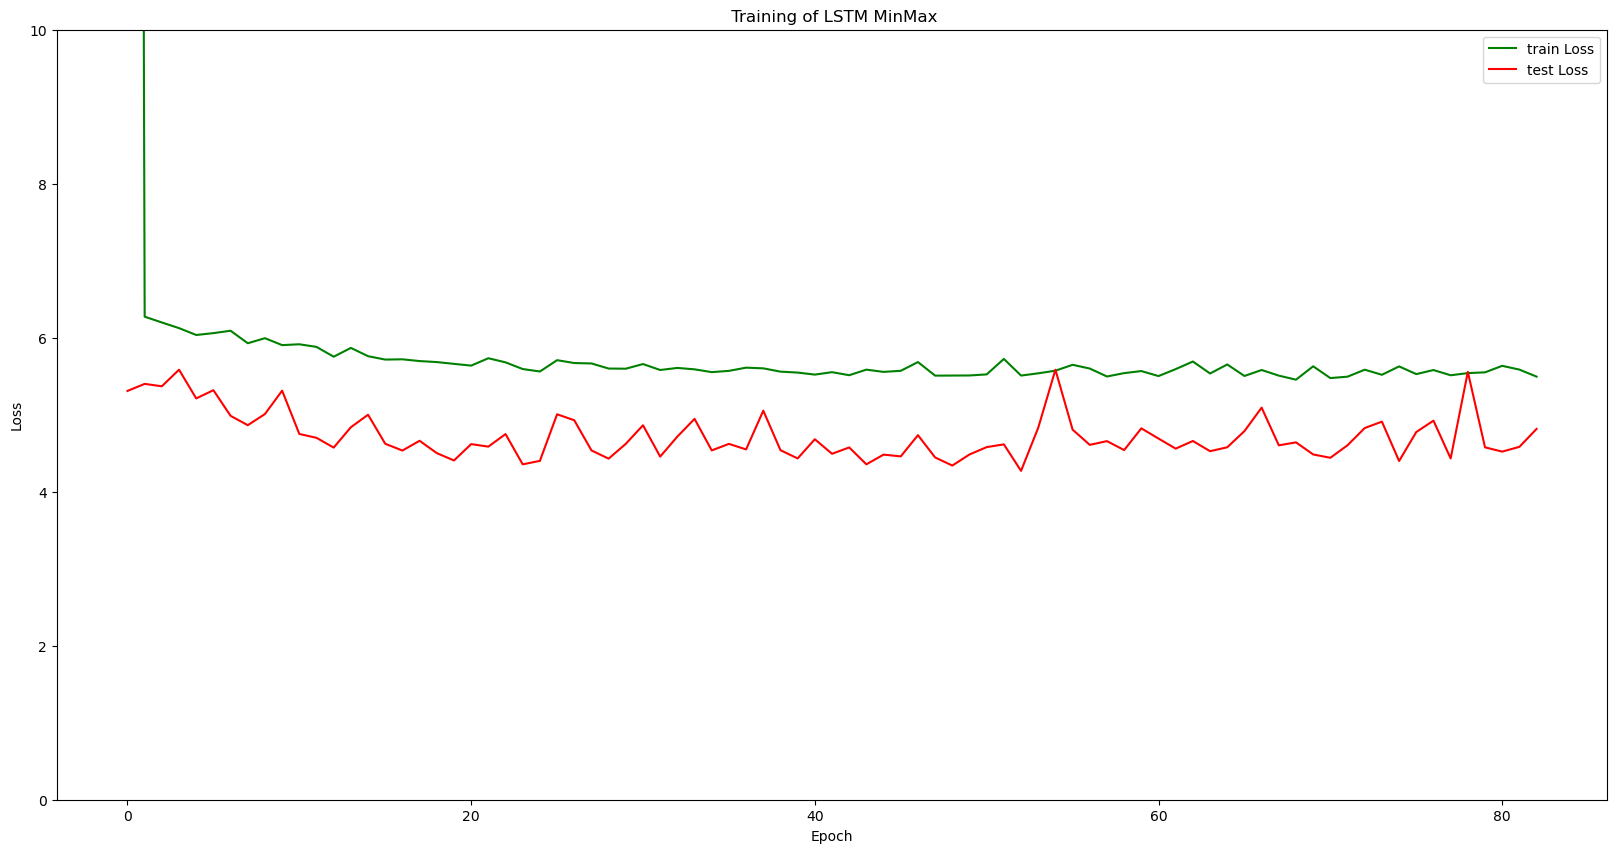

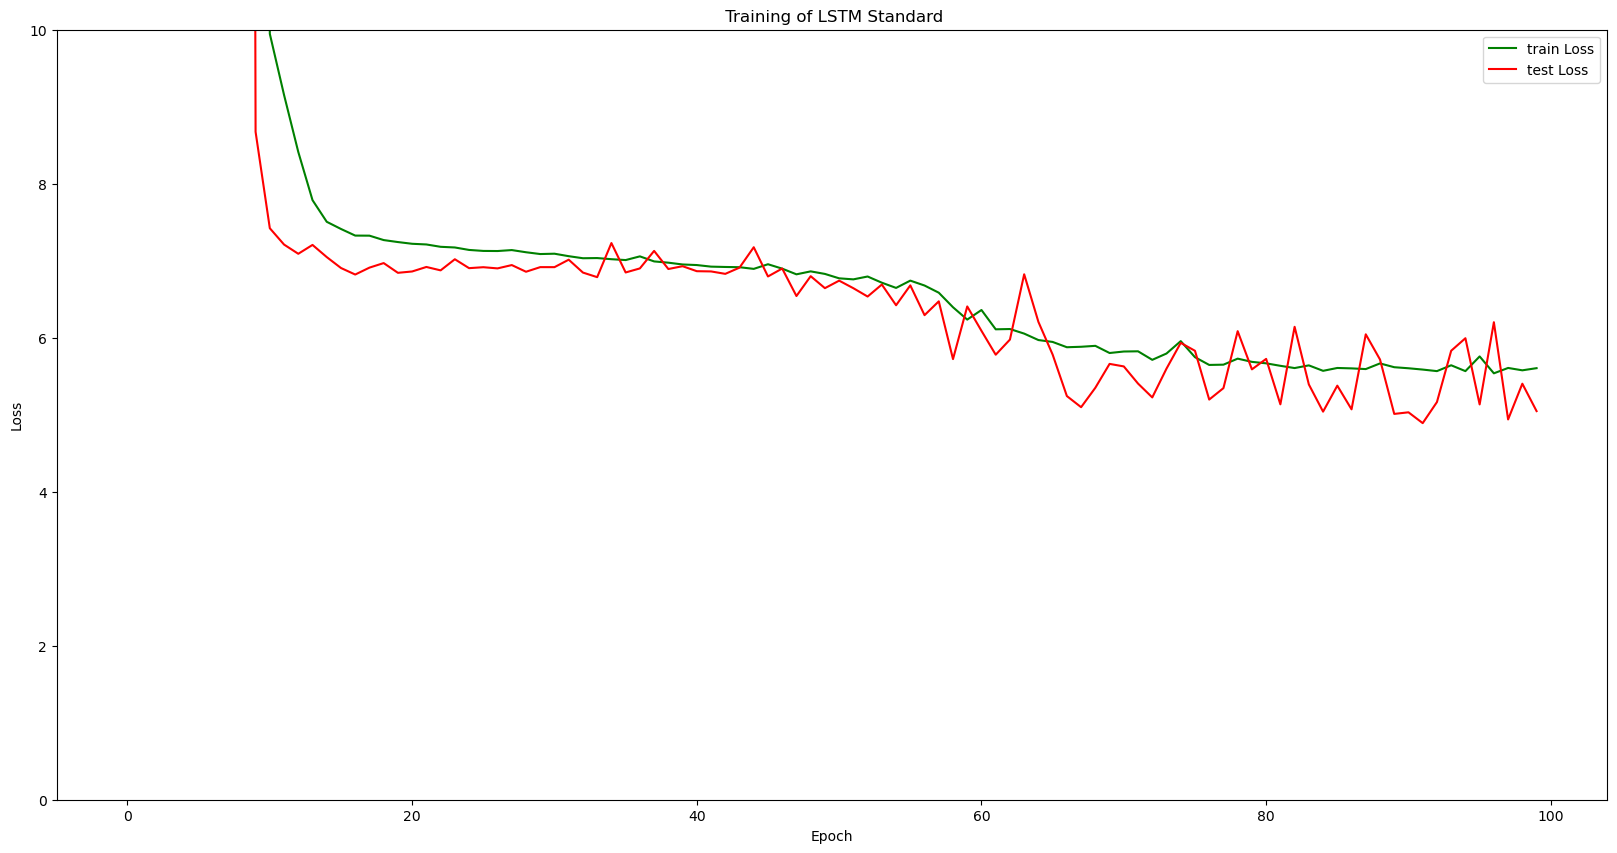

6.98071421225447 7.640216776152747 2.136905228929095 2.216051174184021 0.21008466811716697 0.13545746367943623 2.6421041259296483 2.764094205368686


In [32]:
def create_LSTM(size):
    model = Sequential()
    model.add(LSTM(30, input_shape=(size[0], size[1]), activation = 'relu', return_sequences=True))
    model.add(LSTM(15, activation = 'relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'mse')
    return model

def create_LSTM_m(size):
    model = Sequential()
    model.add(LSTM(80, input_shape=(size[0], size[1]), activation = 'relu', return_sequences=True))
    model.add(LSTM(50, activation = 'relu', return_sequences=True))
    model.add(LSTM(30, activation = 'relu', return_sequences=True))
    model.add(LSTM(10, activation = 'relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(0.0005), loss= 'mse')
    return model

def create_LSTM_s(size):
    model = Sequential()
    model.add(LSTM(80, input_shape=(size[0], size[1]), activation = 'relu', return_sequences=True))
    model.add(LSTM(50, activation = 'relu', return_sequences=True))
    model.add(LSTM(30, activation = 'relu', return_sequences=True))
    model.add(LSTM(10, activation = 'relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss= 'mse')
    return model

scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_ = X_train[:-100]
Y_train_ = Y_train[:-100]
X_val = X_train[-100:]
Y_val = Y_train[-100:]
X_train_m = scaler.fit_transform(X_train_)
X_val_m = scaler.transform(X_val)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train_)
X_val_s = s_scaler.transform(X_val)
X_test_s  = s_scaler.transform(X_test)
X_train_m = X_train_m.reshape((X_train_m.shape[0], X_train_m.shape[1],1))
X_test_m  = X_test_m.reshape((X_test_m.shape[0], X_test_m.shape[1],1))
X_train_s = X_train_s.reshape((X_train_s.shape[0], X_train_s.shape[1],1))
X_test_s  = X_test_s.reshape((X_test_s.shape[0], X_test_s.shape[1],1))

size = [X_train_m.shape[1], X_train_m.shape[2]]
lstm_m = create_LSTM_m(size)
lstm_s = create_LSTM_s(size)
h1 = lstm_m.fit(X_train_m,Y_train_, validation_data = (X_val_m, Y_val), epochs=100, callbacks=[es], verbose = 0)
h2 = lstm_s.fit(X_train_s,Y_train_, validation_data = (X_val_s, Y_val), epochs=100, callbacks=[es], verbose = 0)
pred_m = lstm_m.predict(X_test_m)
pred_s = lstm_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)


plt.figure(figsize=(20,10))
plt.plot( h1.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h1.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of LSTM MinMax')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot( h2.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h2.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of LSTM Standard')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

print(mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s)

# CNN

7/7 [==============================] - 0s 2ms/step


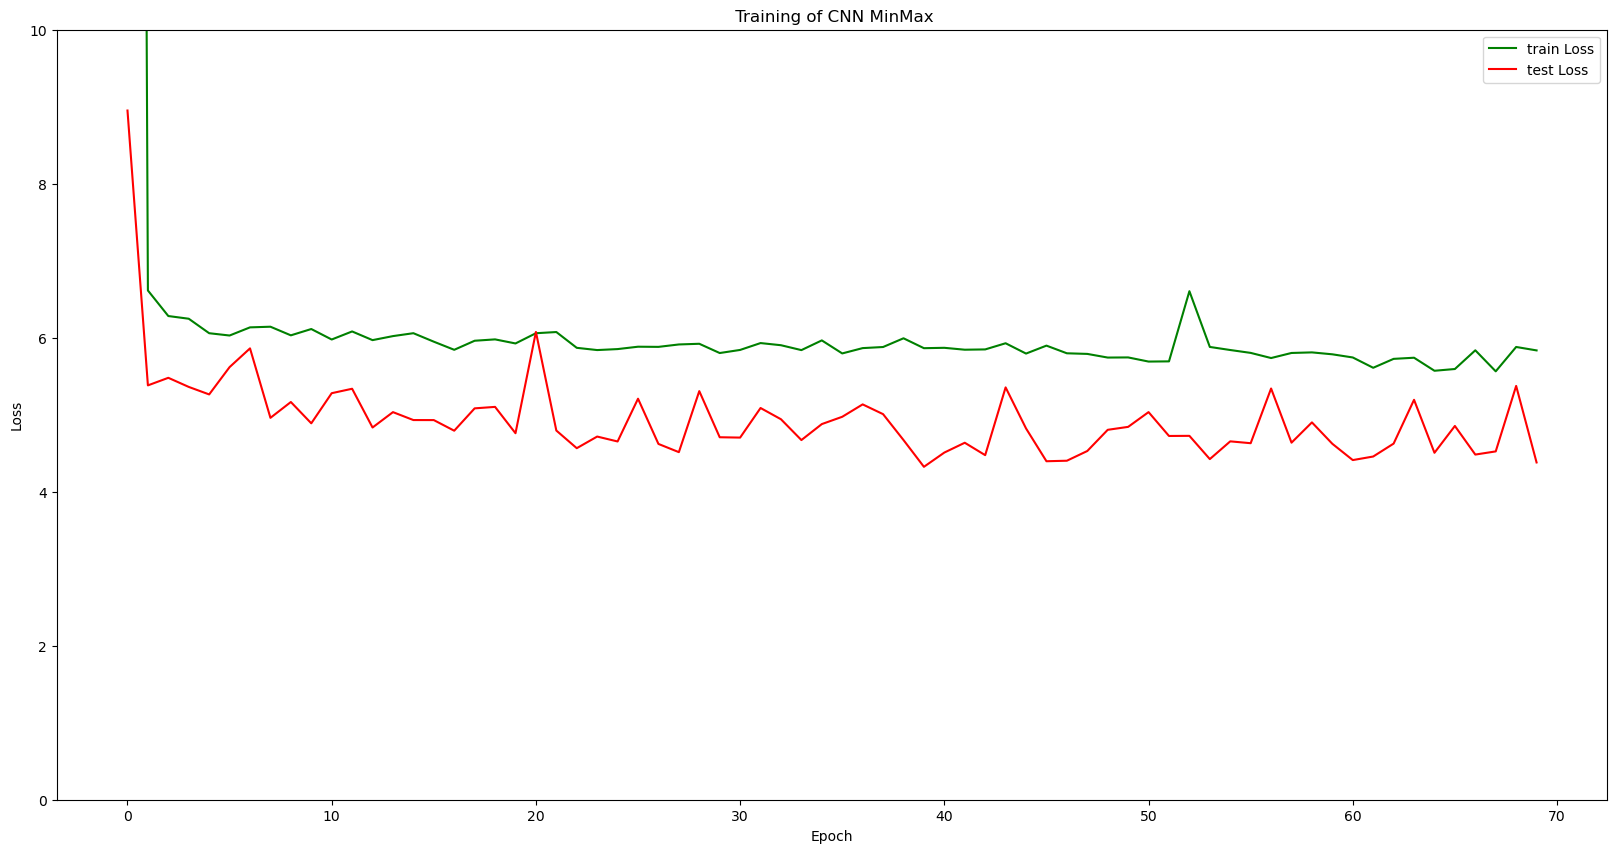

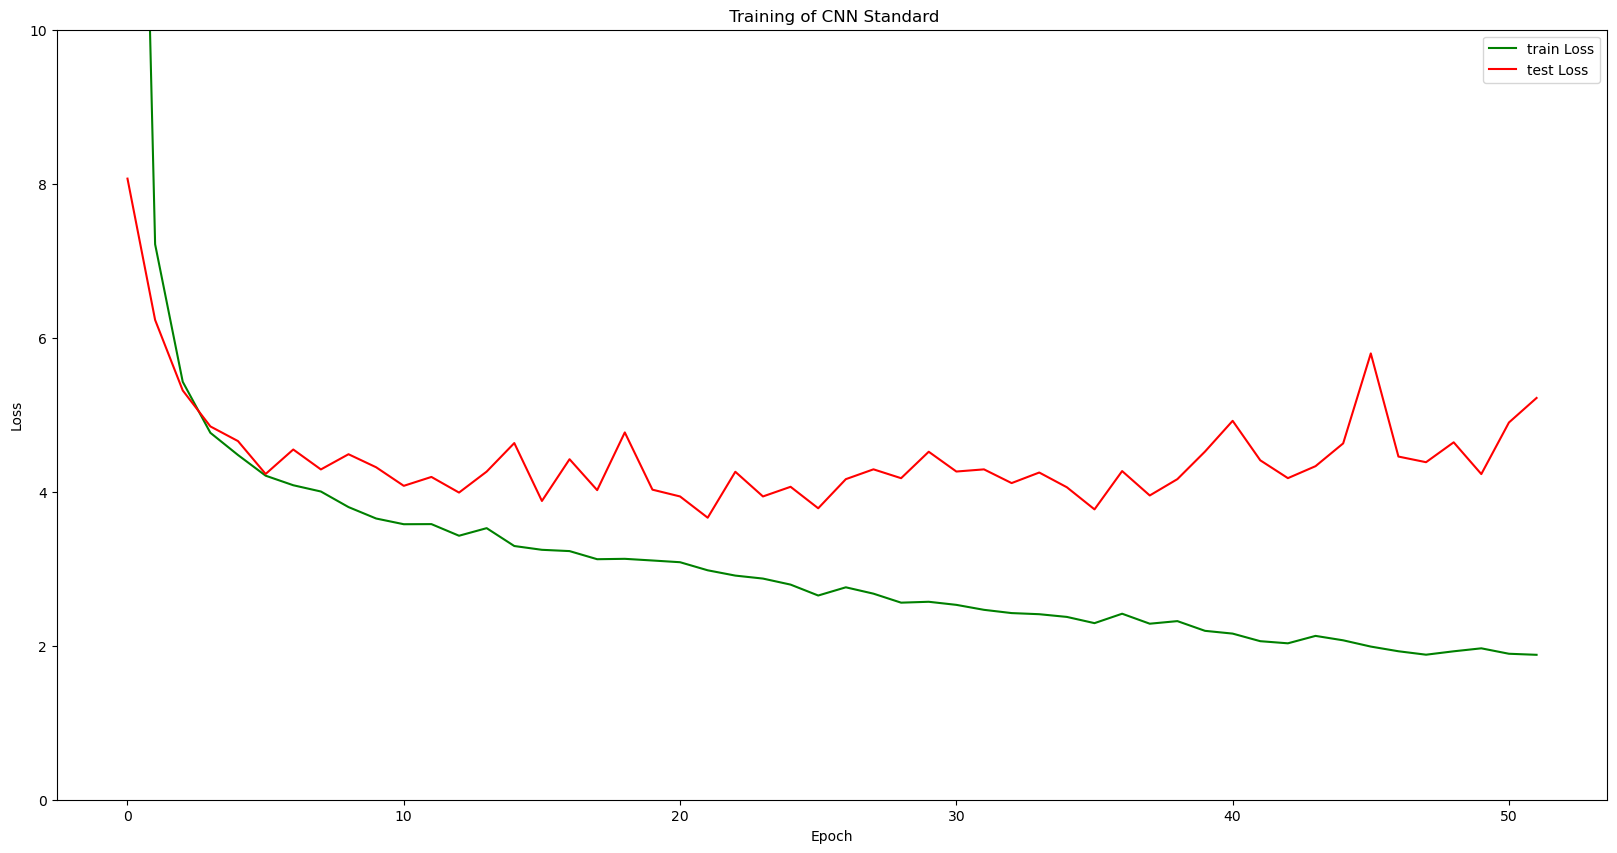

5.506904309036498 5.627956197610225 1.8750447619415305 1.906483409477487 0.3768562911108332 0.36315844590039625 2.3466794218717855 2.3723313844423646


In [30]:
def create_CNN(size):
    model = Sequential()
    model.add(Conv1D(32, 3, input_shape=(size[0], size[1]), activation = 'relu'))
    model.add(Conv1D(64, 2, activation = 'relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'mse')
    return model

def create_CNN_m(size):
    model = Sequential()
    model.add(Conv1D(64, 7, input_shape=(size[0], size[1]), activation = 'relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(0.0005), loss= 'mse')
    return model

def create_CNN_s(size):
    model = Sequential()
    model.add(Conv1D(16, 3, input_shape=(size[0], size[1]), activation = 'relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss= 'mse')
    return model



scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_ = X_train[:-100]
Y_train_ = Y_train[:-100]
X_val = X_train[-100:]
Y_val = Y_train[-100:]
X_train_m = scaler.fit_transform(X_train_)
X_val_m = scaler.transform(X_val)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train_)
X_val_s = s_scaler.transform(X_val)
X_test_s  = s_scaler.transform(X_test)
X_train_m = X_train_m.reshape((X_train_m.shape[0], X_train_m.shape[1],1))
X_test_m  = X_test_m.reshape((X_test_m.shape[0], X_test_m.shape[1],1))
X_train_s = X_train_s.reshape((X_train_s.shape[0], X_train_s.shape[1],1))
X_test_s  = X_test_s.reshape((X_test_s.shape[0], X_test_s.shape[1],1))

size = [X_train_m.shape[1], X_train_m.shape[2]]
cnn_m = create_CNN_m(size)
cnn_s = create_CNN_s(size)
cnn_m.fit(X_train_m,Y_train_, validation_data = (X_val_m, Y_val), epochs=100, callbacks=[es], verbose = 0)
cnn_s.fit(X_train_s,Y_train_, validation_data = (X_val_s, Y_val), epochs=100, callbacks=[es], verbose = 0)
pred_m = cnn_m.predict(X_test_m)
pred_s = cnn_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)


plt.figure(figsize=(20,10))
plt.plot( h1.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h1.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of CNN MinMax')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot( h2.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h2.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of CNN Standard')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

print(mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s)

# LSTM-CNN

7/7 [==============================] - 1s 14ms/step


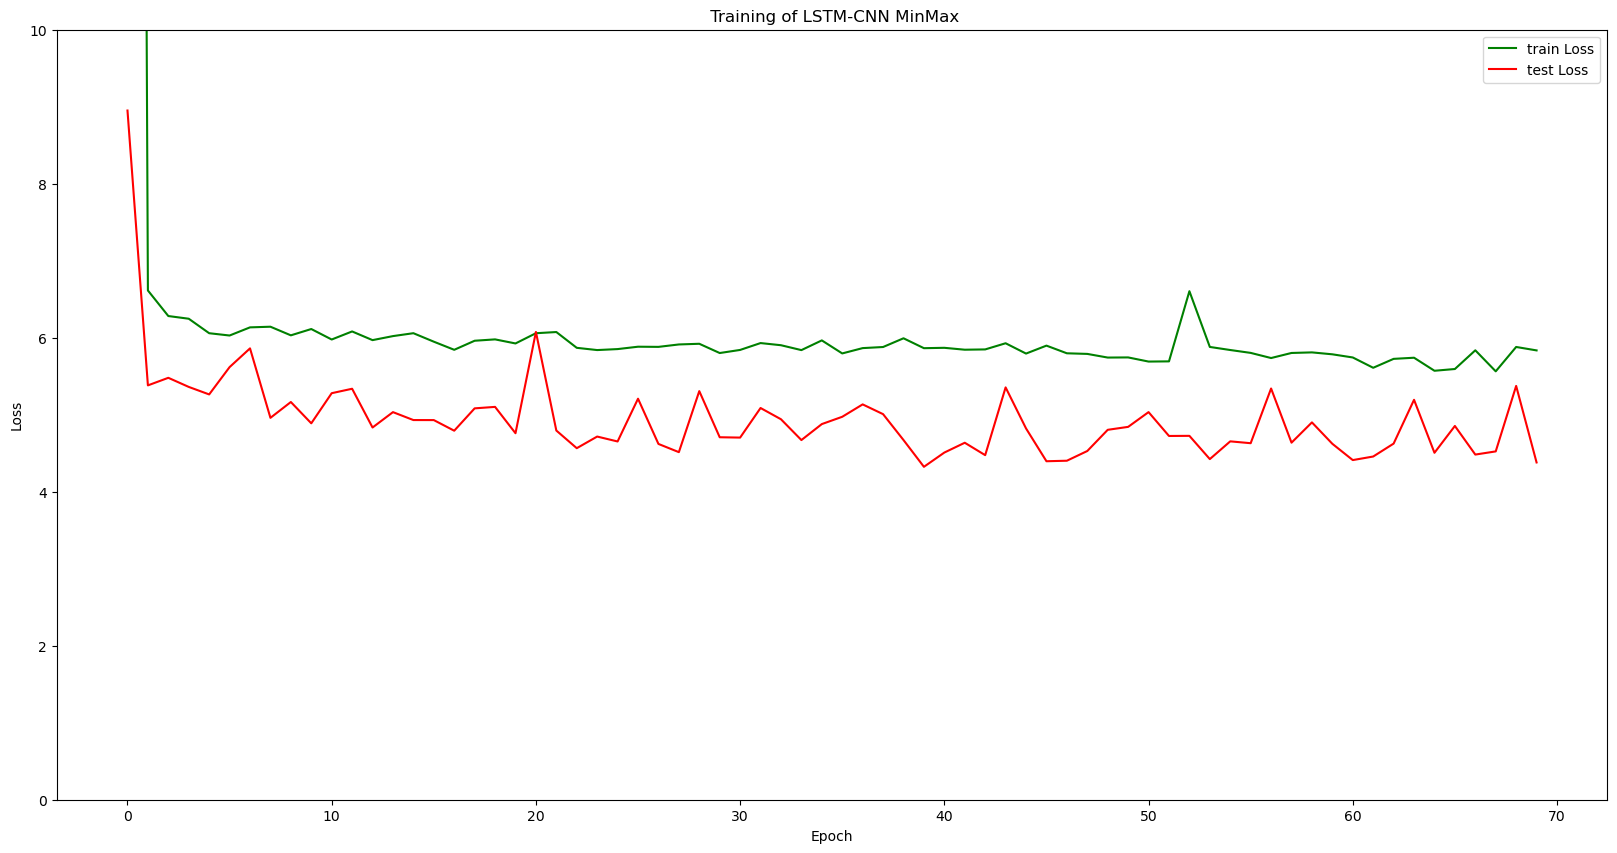

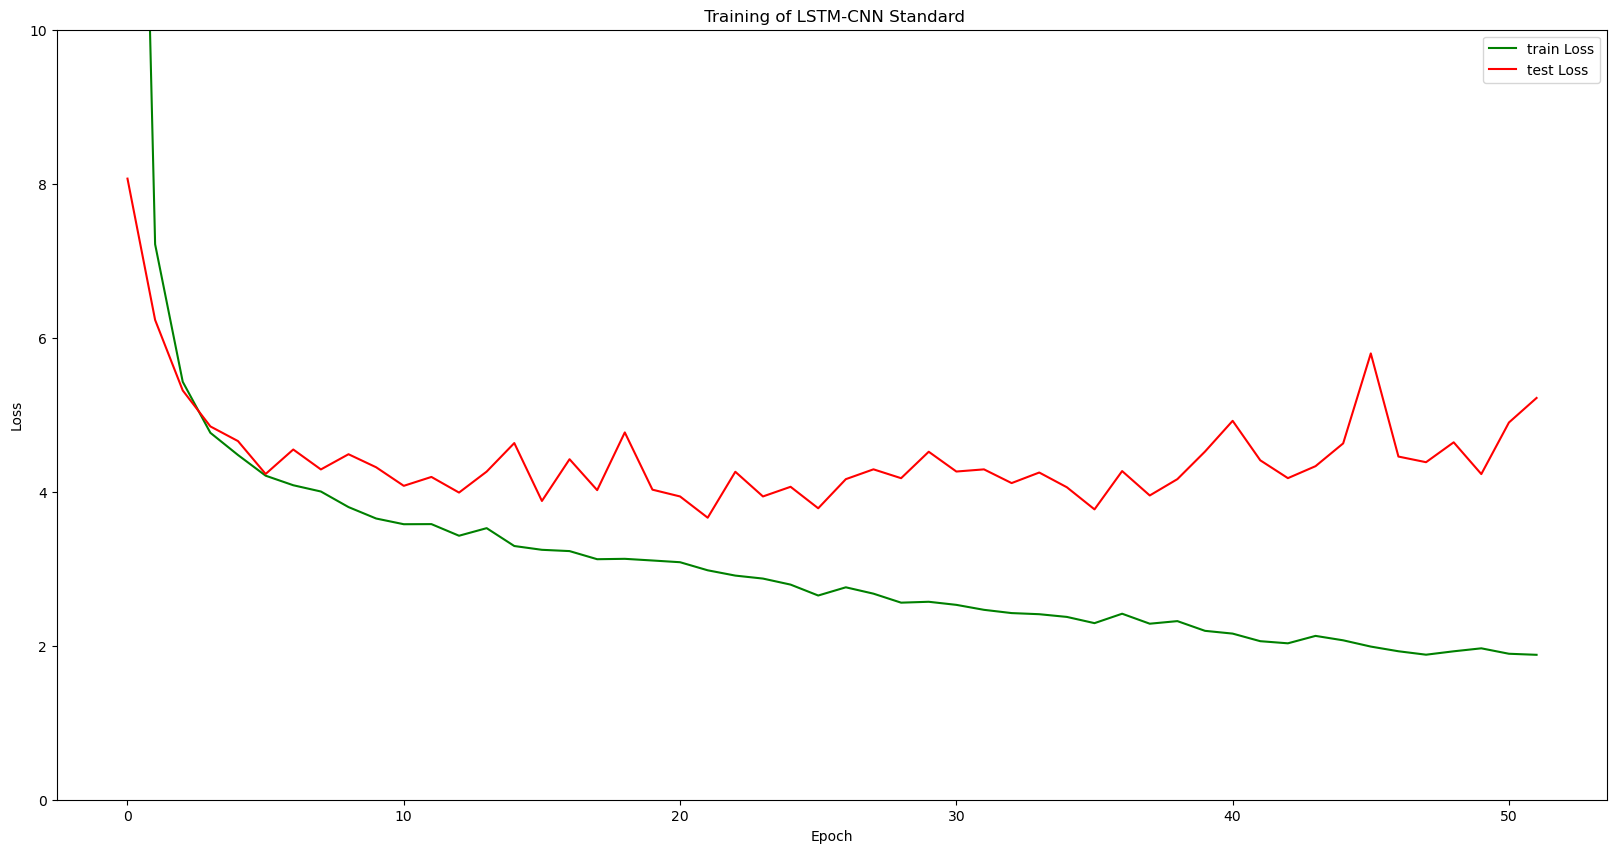

7.08179841047706 7.154112650774634 2.150576036386208 2.140353736093445 0.19864630299301722 0.19046345444949198 2.6611648596952913 2.674717302963929


In [31]:
def create_LSTM_CNN(size):
    model = Sequential()
    model.add(LSTM(30, input_shape=(size[0], size[1]), activation = 'relu', return_sequences=True))
    model.add(LSTM(15, activation = 'relu', return_sequences=True))
    model.add(Conv1D(32, 3, activation = 'relu'))
    model.add(Conv1D(64, 2, activation = 'relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'mse')
    return model


def create_LSTM_CNN_m(size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(size[0], size[1]), activation = 'relu', return_sequences=True))
    model.add(LSTM(30, activation = 'relu', return_sequences=True))
    model.add(LSTM(10, activation = 'relu', return_sequences=True))
    model.add(Conv1D(32, 7, activation = 'relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'mse')
    return model

def create_LSTM_CNN_s(size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(size[0], size[1]), activation = 'relu', return_sequences=True))
    model.add(LSTM(30, activation = 'relu', return_sequences=True))
    model.add(LSTM(10, activation = 'relu', return_sequences=True))
    model.add(Conv1D(64, 7, activation = 'relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'mse')
    return model


scaler = MinMaxScaler()
s_scaler = StandardScaler()
X_train_ = X_train[:-100]
Y_train_ = Y_train[:-100]
X_val = X_train[-100:]
Y_val = Y_train[-100:]
X_train_m = scaler.fit_transform(X_train_)
X_val_m = scaler.transform(X_val)
X_test_m  = scaler.transform(X_test)
X_train_s = s_scaler.fit_transform(X_train_)
X_val_s = s_scaler.transform(X_val)
X_test_s  = s_scaler.transform(X_test)
X_train_m = X_train_m.reshape((X_train_m.shape[0], X_train_m.shape[1],1))
X_test_m  = X_test_m.reshape((X_test_m.shape[0], X_test_m.shape[1],1))
X_train_s = X_train_s.reshape((X_train_s.shape[0], X_train_s.shape[1],1))
X_test_s  = X_test_s.reshape((X_test_s.shape[0], X_test_s.shape[1],1))

size = [X_train_m.shape[1], X_train_m.shape[2]]
lstm_cnn_m = create_LSTM_CNN_m(size)
lstm_cnn_s = create_LSTM_CNN_s(size)
lstm_cnn_m.fit(X_train_m,Y_train_, validation_data = (X_val_m, Y_val), epochs=100, callbacks=[es], verbose = 0)
lstm_cnn_s.fit(X_train_s,Y_train_, validation_data = (X_val_s, Y_val), epochs=100, callbacks=[es], verbose = 0)
pred_m = lstm_cnn_m.predict(X_test_m)
pred_s = lstm_cnn_s.predict(X_test_s)
mse_m = mean_squared_error(Y_test,pred_m)
mse_s = mean_squared_error(Y_test,pred_s)
mae_m = mean_absolute_error(Y_test,pred_m)
mae_s = mean_absolute_error(Y_test,pred_s)
r2_m = r2_score(Y_test,pred_m)
r2_s = r2_score(Y_test,pred_s) 
rmse_m = sqrt(mse_m)
rmse_s = sqrt(mse_s)

plt.figure(figsize=(20,10))
plt.plot( h1.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h1.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of LSTM-CNN MinMax')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot( h2.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( h2.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of LSTM-CNN Standard')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.ylim([0,10])
plt.legend()
plt.show()

print(mse_m, mse_s,mae_m ,mae_s ,r2_m ,r2_s , rmse_m, rmse_s)